#1. 데이터 수집하기
* 1975-2022년 자장면 물가지수
* 2020년 자장면 재료 가격

1.1 데이터 수집하기

In [ ]:
# 파일업로드
from google.colab import files
uploaded = files.upload( )

Saving 자장면소비자물가지수(1975-2022).csv to 자장면소비자물가지수(1975-2022).csv


1.2 데이터프레임에 저장하기

In [ ]:
import pandas as pd
df=pd.read_csv('/content/자장면소비자물가지수(1975-2022).csv', encoding='cp949')
df.head()

,연도,양파,돼지고기,밀가루,자장면
0,1975,6.079,8.361,9.754,2.894
1,1976,7.141,10.893,10.368,3.193
2,1977,5.421,11.235,10.145,4.078
3,1978,11.372,15.103,9.961,4.277
4,1979,11.324,14.592,10.503,5.823


#2 데이터 탐색과 전처리하기
2.1 데이터 둘러보기

In [ ]:
#데이터 속성 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      48 non-null     int64  
 1   양파      48 non-null     float64
 2   돼지고기    48 non-null     float64
 3   밀가루     48 non-null     float64
 4   자장면     48 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


In [ ]:
#물가지수 통계 값 확인하기
df.describe()

,연도,양파,돼지고기,밀가루,자장면
count,48.00,48.000000,48.000000,48.000000,48.000000
mean,1998.50,47.748896,51.061083,51.886542,48.127208
std,14.00,30.117020,30.454378,36.139933,33.056687
min,1975.00,5.421000,8.361000,9.754000,2.894000
25%,1986.75,20.161250,28.561250,20.057500,13.962750
50%,1998.50,41.212500,38.639500,42.547500,49.810500
75%,2010.25,71.345000,76.485250,92.172000,76.074750
max,2022.00,110.109000,120.090000,128.830000,114.200000


#2.2 데이터 전처리하기



In [ ]:
# 2020년도 자장면 재료 가격
price2020=[3734, 2032, 1356, 5195]   #양파, 돼지고기,밀가루, 자장면 가격

자장면 재료별 물가지수를 가격 데이터로 변환

In [ ]:
df['양파 가격']=round(df['양파']*price2020[0]/100,2)
df['돼지고기 가격']=round(df['돼지고기']*price2020[1]/100,2)
df['밀가루 가격']=round(df['밀가루']*price2020[2]/100,2)
df['자장면 가격']=round(df['자장면']*price2020[3]/100,2)

In [ ]:
# 자장면 재료 가격 확인하기
df[41:48]              # 2020년 기준년도의 소비자 물가지수는 100이다

,연도,양파,돼지고기,밀가루,자장면,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
41,2016,93.144,91.841,99.484,88.108,3478.00,1866.21,1349.00,4577.21
42,2017,100.359,97.522,98.352,90.933,3747.41,1981.65,1333.65,4723.97
43,2018,80.856,93.981,99.398,94.982,3019.16,1909.69,1347.84,4934.31
44,2019,68.748,90.311,101.074,98.589,2567.05,1835.12,1370.56,5121.70
45,2020,100.000,100.000,100.000,100.000,3734.00,2032.00,1356.00,5195.00
46,2021,103.560,111.110,100.670,103.070,3866.93,2257.76,1365.09,5354.49
47,2022,94.420,120.090,128.830,114.200,3525.64,2440.23,1746.93,5932.69


#2.3 탐색적 데이터 분석하기

In [ ]:
df2=df.iloc[:,[0,5,6,7,8]]
df2.head()

,연도,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
0,1975,226.99,169.90,132.26,150.34
1,1976,266.64,221.35,140.59,165.88
2,1977,202.42,228.30,137.57,211.85
3,1978,424.63,306.89,135.07,222.19
4,1979,422.84,296.51,142.42,302.50


In [ ]:
#속성간 상관관계 출력
df2.corr()

,연도,양파 가격,돼지고기 가격,밀가루 가격,자장면 가격
연도,1.000000,0.945968,0.957698,0.951221,0.992918
양파 가격,0.945968,1.000000,0.937265,0.929358,0.948798
돼지고기 가격,0.957698,0.937265,1.000000,0.968510,0.964789
밀가루 가격,0.951221,0.929358,0.968510,1.000000,0.965574
자장면 가격,0.992918,0.948798,0.964789,0.965574,1.000000


In [ ]:
#한글 라이브러리 설치하기
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.6 MB/s eta 0:00:00


<Axes: >

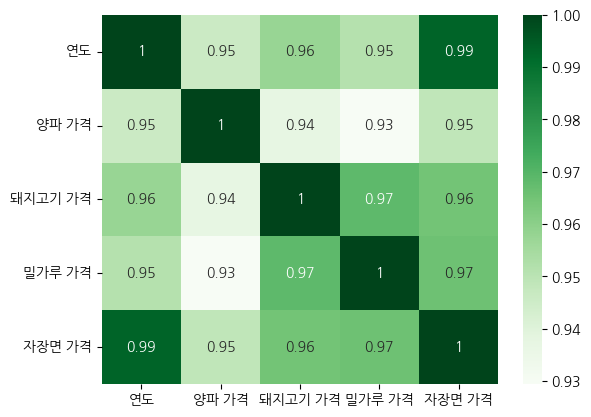

In [ ]:
#히트맵으로 상관관계 시각화하기
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df2.corr(),annot=True, cmap='Greens')   #히트맵 출력

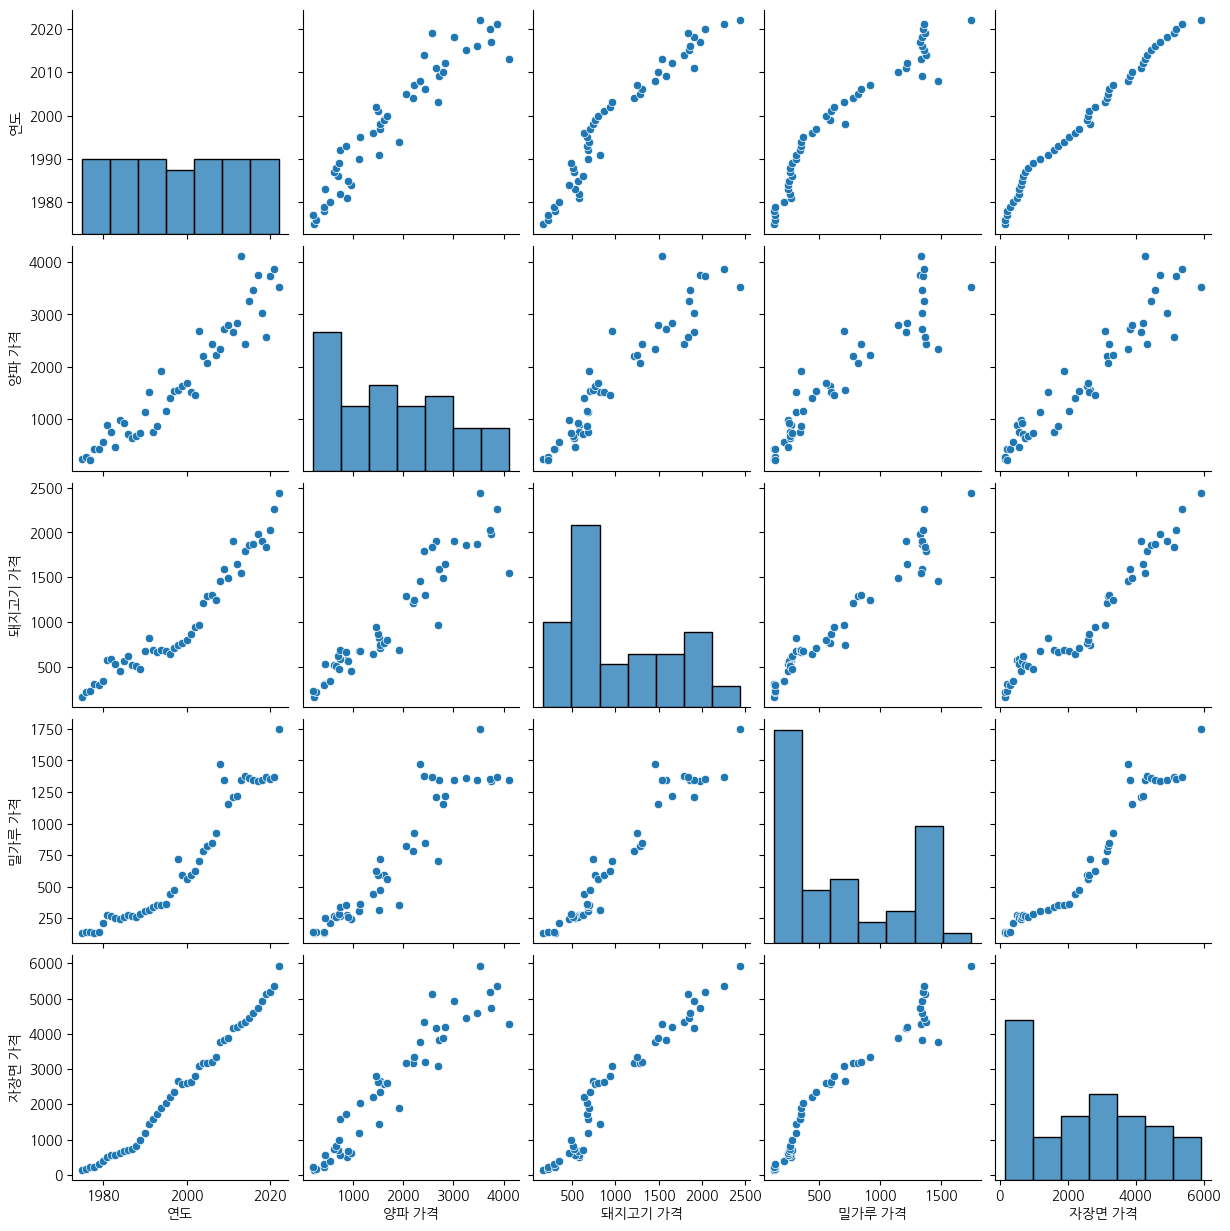

In [ ]:
# pairplot으로 시각화하기
sns.pairplot(df2)

2.4 독립변수와 종속변수 선정하기

In [ ]:

X=df2.iloc[:,0:4]   # 자장면 재료 가격 데이터를 X에 저장
y=df2.iloc[:,4]     # 자장면 가격 데이터를 y데이터에 저장
X.head()

,연도,양파 가격,돼지고기 가격,밀가루 가격
0,1975,226.99,169.90,132.26
1,1976,266.64,221.35,140.59
2,1977,202.42,228.30,137.57
3,1978,424.63,306.89,135.07
4,1979,422.84,296.51,142.42


#2.5 훈련 데이터와 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

#3.모델 생성하기
3.1 모델 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

3.2 회귀계수와 절편 확인하기

In [ ]:
print(model.coef_, model.intercept_)   # coef_ : 회귀계수, intercept_ : 절편

[ 9.05236512e+01 -5.16598841e-02 -1.42036958e-02  1.11373327e+00] -179072.91073198337


In [ ]:
for i in range(4):
  print("w%d = %.3f"%(i+1,model.coef_[i]))
print("b = %.3f"%(model.intercept_))

w1 = 90.524
w2 = -0.052
w3 = -0.014
w4 = 1.114
b = -179072.911


연도를 x1, 양파 가격을 x2, 돼지고기 가격을 x3, 밀가루 가격을 x4라고 할 때 자장면 가격(y)를 예측하는 모델의 식은 다음과 같다.

$$ y= 90.524x_{1}-0.052x_{2} -0.014x_{3} + 1.114x_{3}-179072.911 $$





3.3 모델 성능 확인하기

In [ ]:
print('훈련 데이터로 학습한 모델의 성능(R2):', model.score(X_train, y_train))

훈련 데이터로 학습한 모델의 성능(R2): 0.990367142834585


# 4. 모델 평가 및 예측하기

4.1 모델 성능 평가하기

In [ ]:
# 테스트 데이터로 모델 성능 평가
print('테스트 데이터로 모델의 성능(R2) 평가:', model.score(X_test, y_test))

테스트 데이터로 모델의 성능(R2) 평가: 0.9868577505270044



* mean_absolute_error 오차들의 절댓값 합  
* mean_squared_error 오차제곱들의 합  
* r2_score 결정계수

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred=model.predict(X_test)

print('Mean squared error :', mean_squared_error(y_pred, y_test))
print('Mean absolute error :', mean_absolute_error(y_pred, y_test))
print('R2 score : ', r2_score(y_pred, y_test))

Mean squared error : 34028.10861126105
Mean absolute error : 138.2266301742925
R2 score :  0.9878606453693126


4.2 모델 예측하기

In [ ]:
y_pred=model.predict(X_test)
print('실제값:')
print(y_test[:5])
print('예측값:', y_pred[:5])

실제값:
27    2794.18
40    4452.27
26    2638.49
43    4934.31
24    2569.40
Name: 자장면 가격, dtype: float64
예측값: [2762.6087711  4656.94528288 2638.6135125  4921.85751123 2449.88162111]


#5. 모델 활용 문제해결하기

새로운 데이터 불러오기

In [ ]:
df_new=pd.read_csv('new_data.csv', encoding='cp949')
df_new

,연도,양파 가격,돼지고기 가격,밀가루 가격
0,2030,4176.51,2371.04,1752.46
1,2040,4972.20,2794.36,2085.39
2,2050,5737.62,3217.69,2418.36


In [ ]:
print(model.predict(df_new))

[6392.43863948 7621.35240743 8851.87432737]
